# Data Augmentation

In this notebook we explored some ways of augmenting the images using PyTorch, which has methods to do that

# Mounting google drive

In order to make it easy to read data from Google Drive, it can be mounted as a "local" unity. This encapsulates the connection to Google API and reduces the amount of coding that would be needed when interacting with Google API

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
import os

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

Here we load the images and labels on a Tensor

In [ ]:
base_folder = "/content/gdrive/MyDrive/08 CS670 Artificial Intelligence/Term Project"
data_folder = os.path.join(base_folder, "transformed_images")
transform = transforms.Compose([
    transforms.ToTensor()
)

dataset = datasets.ImageFolder(data_folder, transform=transform)

In [ ]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True, drop_last=True)
images, labels = next(iter(dataloader))

In [ ]:
labels

tensor([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1])

The function below shows a image from a item on a Tensor

In [ ]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

<Axes: >

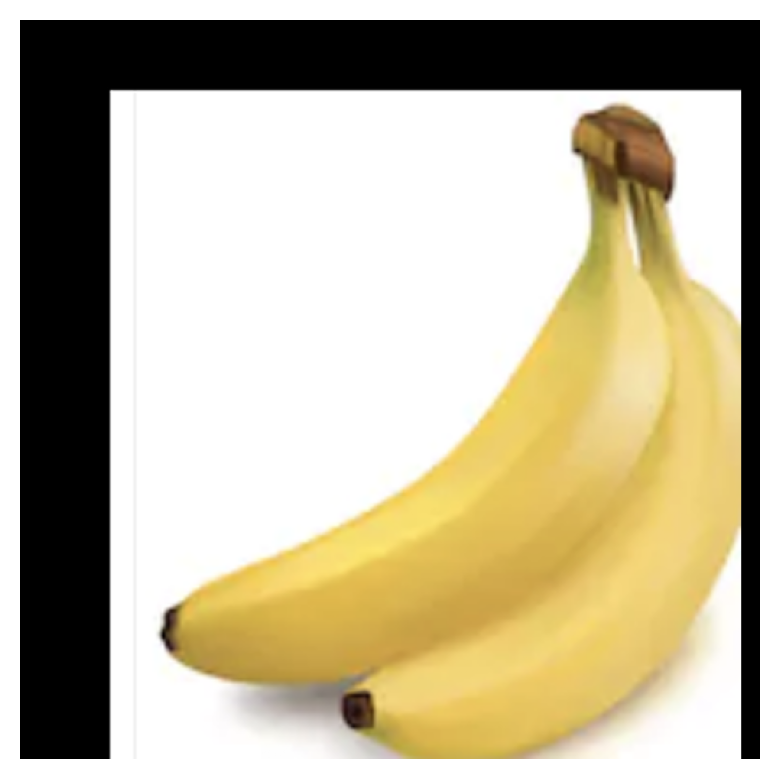

In [ ]:
imshow(images[0], normalize=False)

Here we reload the same data, but ramdonly rotating (up to 90 degrees) and vertically and horizontally flipping images, to produce "new" images to be used during the training and test phase.

In [ ]:
transform =  transforms.Compose([
    transforms.RandomRotation(90),
    transforms.RandomHorizontalFlip(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()]
)
dataset_augmented = datasets.ImageFolder(data_folder, transform=transform)

And we finally concatenate the two datasets, doubling the number of images we initially have

<Axes: >

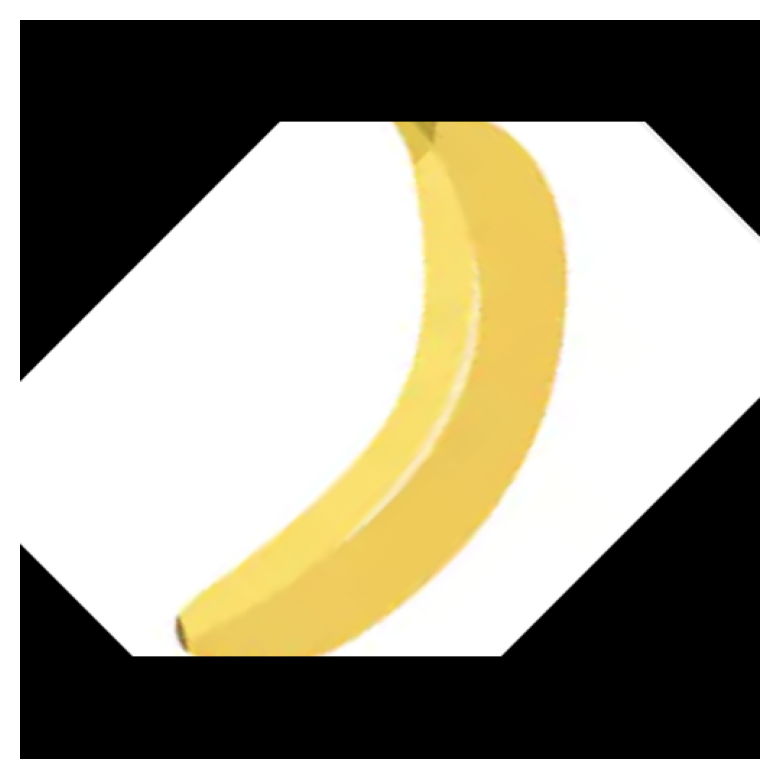

In [ ]:
final_dataset = torch.utils.data.ConcatDataset([dataset, dataset_augmented])

dataloader = torch.utils.data.DataLoader(final_dataset, batch_size=64, shuffle=True, drop_last=True)
images, labels = next(iter(dataloader))
imshow(images[0], normalize=False)